<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 14 - Markov Decision Processes & Planning 

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# 14.1 Theory Review

## 14.1.1 [1 Point] MDPs

- The simplest formulation of sequential decision making problems is called Markov Decision Processes (MDPs), denoted as a 5-tuple $\langle S,A,P,R,\gamma\rangle$. Explain very briefly each element.

- Mô hình ra quyết định đơn giản nhất gọi là mô hình Markov (MDPs), gồm 5 thành phần $\langle S,A,P,R,\gamma\rangle$. Giải thích ngắn gọn từng thành phần.


## 14.1.2 [1 Point] MDP objective function

- Explain in detail: What is the objective function of an MDP? That is, what does the RL agent/controller try to maximize?

- Giải thích chi tiết: Hàm mục tiêu trong MDP là gì? Tức là, giải thuật RL đi tối ưu cái gì?

## 14.1.3 [1 Point] Planning in MDP

- What are the differences between planning and learning in MDPs? How to solve MDP planning using Dynamic Programming (DP)?

- Lên kế hoạch khác với học điều khiển trong MDPs ra sao? Phương pháp quy hoạch động (DP) giải quyết bài toán lên kế hoạch trong MDPs ra sao?


**14.1.1.**

S : Trạng thái hiện tại của agent là gì

A : Agent sẽ thực hiện hành động gì 

P : Xác xuất để thực hiện hành động đó 

R : Sau khi thực hiện hành động đó ta sẽ được phần thưởng gì 

$\gamma$ : Hệ số discount. Để đảm bảo cho cái value của action càng xa đích thì càng nhỏ.

**14.1.2**

Hàm mục tiêu trong MDP

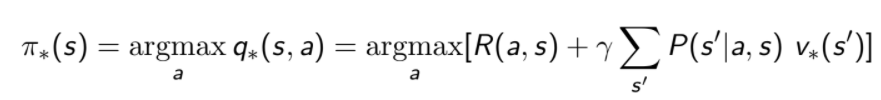

Giải thuật sẽ cố gắng chọn ra các actions tối ưu nhất tức là chọn ra những cái có Q_action lớn nhất để tối đa hoá R nhận được. Nghĩa là nó sẽ đi tìm ra những policy tốt nhất 

**14.1.3**
Planning khác Learning : Không có hệ số P máy sẽ phải tự học để đưa ra hành động tiếp theo nào là tốt nhất

Phương pháp : Chia bài lớn thành nhiều bài nhỏ xong giải quyết bài nhỏ là sẽ giải quyết được bài lớn. Sau khi vừa chia xong là ta sẽ lập tức giải

# 14.2 [5 Points] Coding Practice

Trong Assignment này, ta sẽ thực hiện Planning cho game Hồ Băng (Frozen Lake). Khác với bài lab, môi trường game sẽ được tạo tự động bởi thư viện Gym của OpenAI và game sẽ có tính năng trượt (thực hiện action **`A`** nhưng sẽ không đến state **`s'`** mong muốn mà sẽ trượt sang state khác)

![frozen-lake-map](https://i.imgur.com/1WS7wFJ.png)

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

## 14.2.1 Khởi tạo môi trường game hồ băng

Ở đây ta dùng lệnh render để hiển thị bản đồ game, cũng như vị trí hiện tại, các hố băng và Goal.

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=True)
env.seed(42)
env.render()


SFFF
FHFH
FFFH
HFFG


Môi trường được Gym tạo ra cũng có 4 action (left, down, right, up)

In [ ]:
print(env.action_space)
# or
print(env.env.nA)

Discrete(4)
4


Và 16 state

In [ ]:
print(env.observation_space)
# or 
print(env.env.nS)


Discrete(16)
16


Hệ thống reward của game (0 cho mọi nơi và 1 cho goal)

In [ ]:
env.reward_range

(0, 1)

Test thử tính năng trượt của game, ở vị trí hiện tại (current_state = 0) ta sẽ thử thực hiện di chuyển sang bên phải (action số 2) với hy vọng là next_state sẽ bằng 1

In [ ]:
env.reset()
env.step(2)
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


Chạy cell bên trên, ta quan sát được mặc dù đã thực hiện Action=Right nhưng vị trí hiện tại của player vẫn không thay đổi. Hãy thử chạy cell trên nhiều lần xem player sẽ bị **trượt** đến ô nào.

Ở đây, ta thực hiện kiểm tra **Khi thực hiện 1 action bất kỳ, xác suất cũng như state bị dịch chuyển đến là bao nhiêu**

In [ ]:
current_state = env.reset()
action = 0 # Right
env.P[current_state][action]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False)]

4 con số được trả ra tương ứng với **`(xác suất, new state, reward, biến boolean thể hiện game có kết thúc hay không)`**

Thử Test tính năng Trượt 1 lần nữa, ở đây ta giả lập rằng current_state=10 và đi sang trái (Học viên tự thay đổi current_state và action để quan sát xem player sẽ bị trượt đến những ô nào)

In [ ]:
env.reset()
current_state=10
action = 0# left
env.P[current_state][action]

[(0.3333333333333333, 6, 0.0, False),
 (0.3333333333333333, 9, 0.0, False),
 (0.3333333333333333, 14, 0.0, False)]

## 14.2.2 [1 Point] Question: Từ những lần test trên, kết luận xem tính năng trượt của game hoạt động như thế nào?



**Your answer here**

Phụ thuộc vào xác xuất P có thể action = 'Right' tuy nhiên vẫn có thể dịch chuyển theo hướng khác

Sau khi đã hiểu được tính năng trượt của game hoạt động như thế nào, học viên hãy tự chơi trước để có thể so sánh cách chơi của mình với cách chơi của máy sau khi học.

## 14.2.3 [2 Points] Planning

Các hàm hỗ trợ 

*   ``play_one_game()``: để render ra môi trường game và các action của agent theo optimal policy đã học được
*   ``get_average_winrate()``: cho agent chơi 1000 game (episodes) theo **optimal policy** và đánh giá win rate

  * **Khuyến khích học viên đọc hiểu code 2 hàm bên trên**

*   ``visualize_policy()``: vẽ ra policy tối ưu



In [ ]:
def play_one_game(env, policy):
  cur_state = env.reset()
  print('Starting position')
  env.render()
  while True:
    best_action = policy[cur_state]
    cur_state, reward, terminated, _ = env.step(best_action)
    env.render()
    if terminated and reward == 1:
      print('You Win!')
      break
    elif terminated and reward == 0:
      print('You Lose!')
      break

def get_average_winrate(env, policy, episodes=1000):
  misses = 0
  steps_list = []
  for episode in range(episodes):
    state = env.reset()
    steps=0
    while True: 
      action = policy[state]
      state, reward, terminated, _ = env.step(action)
      steps+=1
      if terminated and reward == 1:
        # win
        steps_list.append(steps)
        break
      elif terminated and reward == 0:
        # lose
        misses += 1
        break
  print('----------------------------------------------')
  print('You took an average of {:.0f} steps to get the frisbee'.format(np.mean(steps_list)))
  print('And you fell in the hole {:.2f} % of the times'.format((misses/episodes) * 10))
  print('----------------------------------------------')


def visualize_policy(policy, terminal):
  index_to_action = {
    0:'left',
    1:'down',
    2:'right',
    3:'up'
  }
  temp = []
  for i in range(4):
    temp_1 = []
    for j in range(4):
      temp_1.append(index_to_action.get(policy[i*4+j]))
    temp.append(temp_1)

  data = pd.DataFrame(temp)
  fig, ax = plt.subplots(figsize=(10,10))
  ax.set_axis_off()
  tb = Table(ax, bbox=[0,0,1,1])

  nrows, ncols = 4, 4
  width, height = 1.0 / ncols, 1.0 / nrows

  bkg_colors = ['teal' for i in range(16)]
  for pos in terminal:
    bkg_colors[pos] = 'blue'
  bkg_colors[0] = 'orange'
  bkg_colors[15] = 'green'
  

  # Add cells
  for (i,j), val in np.ndenumerate(data):
    # Index either the first or second item of bkg_colors based on
    # a checker board pattern
    color = bkg_colors[i*4 + j]
    if i*4+j in terminal and i*4+j!=15:
      tb.add_cell(i, j, width, height, text='die', 
                  loc='center', facecolor=color)
    elif i*4+j==15:
      tb.add_cell(i, j, width, height, text='goal', 
                  loc='center', facecolor=color)
    else:
      tb.add_cell(i, j, width, height, text=val, 
                  loc='center', facecolor=color)

  ax.add_table(tb)
  plt.show()

Sự khác nhau giữa bài lab (môi trường tự tạo) và Assignment (môi trường có sẵn của Gym.


<table style="width:100%">
  <tr>
    <th>Bài Lab</th>
    <th>Assignment</th>
  </tr>
 
  <tr>
    <td>Tự tạo reward theo state hiện tại</td>
    <td>Ta có biến reward được môi trường trả ra</td>
  </tr>
  <tr>
    <td>Deterministic Environment (thực hiện action a, mặc định sẽ đến state s')</td>
    <td>Stochastic Environment (thực hiện action a, môi trường có xác suất quyết định state s' sẽ đến)</td>
  </tr>
    <tr>
    <td>P(s' | a,s) = 1 và không có sum</td>
    <td>Có xác suất do đó có sum giữa những state s'</td>
</table>


Ở phần này, ta dùng Bellman's Optimality Equations để thực hiện Planning

**Bellman's Optimality Equations**

(Cho bài toán hồ băng với Stochastic Environment) 

$$
\forall s,a: ~ Q(s,a) = \sum_{s'} P(s'|s,a)\big[R(s,a,s') + \gamma \max_{a'}(Q(s',a'))\big].
$$

**GỢI Ý VIẾT HÀM PLANNING**

- Các thông số quan trọng
  - $P(s'|s,a)$: xác suất đến được state $s'$ sau khi thực hiện action $a$ tại state $s$  
  - $R(s,a,s')$: reward nhận được khi đến được state $s'$ từ state $s$ với action $a$
- Ta dùng câu lệnh sau để lấy ra các thông số trên:
```
for probability, next_state, reward, terminated in env.P[state][action]:
```
  - ``next_state``: một con số đại diện cho vị trí của ô tiếp theo
  - ``probability``: xác suất đến được ``next_state``
  - ``reward``: reward của ``next_state``, $1$ khi về đích, $0$ trong các trường hợp còn lại
  - ``terminated``: ``True`` hoặc ``False``, ``True`` khi agent rớt xuống hố hoặc về đích, ``False`` trong các trường hợp còn lại
- Ta cần dùng 1 biến tạm để tính tổng cho tất cả các trường hợp trong vòng ``for`` bên trên
- Sau đó, gán giá trị của biến tạm cho ``Q[state, action]``

### TODOs [2 Point]

*   Hoàn thành hàm ``planning()``
*   Hoàn thành hàm ``get_policy_from_Q()``, gợi ý:
   * Đầu tiên, ta khởi tạo biến ``policy`` là 1 vector có shape=16, chỉ chứa toàn số $0$
   * Ta dùng argmax tại mỗi ``state`` của ma trận ``Q`` để tìm ra action tối ưu tại state đó. Đưa số này vào vị trí tương ứng trong vector ``policy``
   


$$
\forall s,a: ~ Q(s,a) = \sum_{s'} P(s'|s,a)\big[R(s,a,s') + \gamma \max_{a'}(Q(s',a'))\big].
$$

In [ ]:
def planning(env, iters, Q, gamma, terminated_states):
    for i in range(iters) :
        for state in range(Q.shape[0]):
            if state in terminated_states : 
                continue
            for action in range(Q.shape[1]):
                Q_values = sum([prob*(r + gamma *max(Q[s_])) for prob, s_, r, _ in env.P[state][action]])
                Q[state,action] = Q_values
    return Q

def get_policy_from_Q(env, Q):
    policy = np.zeros(shape = (16))
    for state in range(Q.shape[0]):
        policy[state] = np.argmax(np.array(Q[state]))
    return policy.astype(np.uint8)



## 14.2.4 [2 Points] Play the game and evaluate agent's win rate

![frozen-lake-map](https://i.imgur.com/1WS7wFJ.png)

### TODOs [0.5 Point]

- Gọi hàm ``planning()`` với số ``iters`` và ``gamma`` tùy chọn (2 con số này sẽ ảnh hưởng đến policy cuối cùng)
- Gọi hàm ``get_policy_from_Q()``

In [ ]:
Q = np.zeros(shape=(env.env.nS, env.env.nA))
terminated_states = [5, 7, 11, 12, 15]

# YOUR CODE GOES HERE
Q_1 = planning(env,1000,Q,1,terminated_states)

policy = get_policy_from_Q(env,Q_1)
print(policy)

[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


**Visualize Q-matrix**

In [ ]:
import pandas as pd
actions = ["left", "down", "right", "up"]
dict_Q = {actions[0]: Q.T[0], actions[1]: Q.T[1], actions[2]: Q.T[2], actions[3]: Q.T[3]}  # visualize Q to easily understand
print(pd.DataFrame(dict_Q),"\n")

        left      down     right        up
0   0.823529  0.823529  0.823529  0.823529
1   0.549020  0.549020  0.549020  0.823529
2   0.725490  0.725490  0.725490  0.823529
3   0.549020  0.549020  0.549020  0.823529
4   0.823529  0.549020  0.549020  0.549020
5   0.000000  0.000000  0.000000  0.000000
6   0.529412  0.254902  0.529412  0.274510
7   0.000000  0.000000  0.000000  0.000000
8   0.549020  0.549020  0.549020  0.823529
9   0.568627  0.823529  0.549020  0.529412
10  0.764706  0.588235  0.490196  0.450980
11  0.000000  0.000000  0.000000  0.000000
12  0.000000  0.000000  0.000000  0.000000
13  0.568627  0.607843  0.882353  0.588235
14  0.862745  0.941176  0.901961  0.882353
15  0.000000  0.000000  0.000000  0.000000 



**Visualize policy**

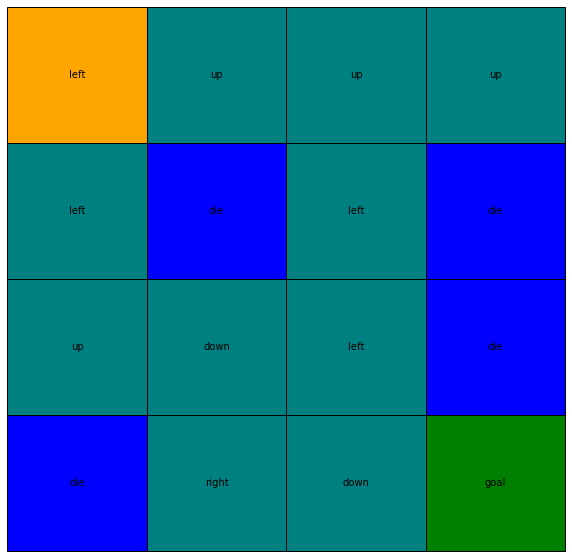

In [ ]:
visualize_policy(policy, terminated_states)


**Play thử 1 game**

**lưu ý** mỗi lần chơi sẽ có kết quả khác nhau do xác suất bị trượt


In [ ]:
play_one_game(env, policy)

Starting position

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (L

### TODOs [0.5 Point]
* Dùng hàm ``get_average_winrate`` để đánh giá performance của model

In [ ]:
# YOUR CODE GOES HERE
get_average_winrate(env,policy)

----------------------------------------------
You took an average of 39 steps to get the frisbee
And you fell in the hole 2.60 % of the times
----------------------------------------------


**Nếu bạn tìm được policy tối ưu thì sẽ đạt được win-rate = 97%**

### TODOs [1 Point]

Cùng nhìn lại hình vẽ policy 1 lần nữa


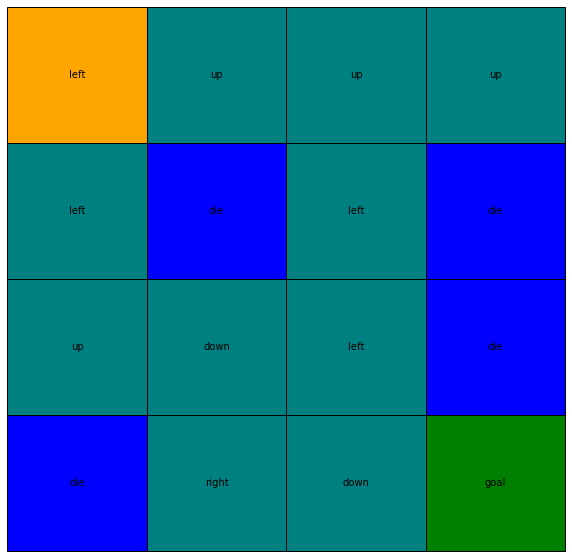

In [ ]:
visualize_policy(policy, terminated_states)

*   Giải thích tại sao ở state 4, policy lại đi sang trái thay vì đi xuống
*   Giải thích tại sao ở state 8, policy lại đi lên thay vì đi sang phải
*   Mô tả luồng đi sẽ khiến agent thua game.

**Your answers here**





Ta thấy tại state 4 thì Left có value action cao nhất



Ta thấy tại state 8 thì up có value action cao nhất

In [ ]:
Những luồng đi nào đi về hố băng sẽ khiến agent thua game : 0>1>6, 0>1>2>7>6